# Jose Alexander Rios Trespalacios
***Opus Regresion Lineal Multivariada***

In [1]:
 ! git clone https://github.com/Orozco-Duque/ML.git

Cloning into 'ML'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 139 (delta 40), reused 0 (delta 0), pack-reused 88
Receiving objects: 100% (139/139), 3.65 MiB | 18.97 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [2]:
import numpy as np
import numpy.matlib 
import pandas as pd
import matplotlib.pyplot as plt

Ejercicios:



1. Construir una función para implementar la regresión lineal multivariada de una forma mas estructurada. Definir entradas y salidas. Se sugiere construir una función de predicción y una función de entrenamiento (que contenga todo lo necesario para ajustar los parametros del modelo).



In [3]:
data2=pd.read_table('/content/ML/ex1data2.txt',sep=',',header=None)

In [4]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Vamos a extraer las dos primeras columnas como entradas y la última columna como salida.


In [5]:
X=np.array(data2.values[:,0:2])
y=np.array(data2.values[:,2])
y=y.reshape([y.size,1])

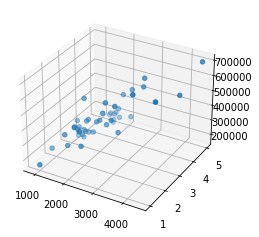

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, cmap='Greens');

Vamos a inicializar los parametros, en este caso, construiremos un vector de pesos:


In [7]:
print(X.shape[1])

2


A continuación creamos el vector de pesos, de 1 fila y N + 1 columnas, donde N es el número de variables.

In [8]:
W=np.random.random([1,X.shape[1]+1])
print(W)

[[0.28246326 0.55923896 0.11134622]]


In [9]:
W=np.zeros([1,X.shape[1]+1])
print(W)

[[0. 0. 0.]]


A continución, implementar la ecuación matricial para la predicción del modelo:

Para esta implementación se debe agregar una columna de unos para multiplicar al parametro  w0

In [10]:
X2=np.c_[np.ones((X.shape[0],1)),X]
print(X2[:5,:])

[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]]


Seguimos con la función de predicción, donde como parametros recibe los parametros como vector y las observaciones X como una matriz, en esta matriz, las filas corresponden a las observaciones y las columnas a las características o variables.

In [11]:
predictionM=np.matmul(X2,W.T)
print(predictionM.shape)

(47, 1)


La función de costo:

In [12]:
def ecm(predicted,y):
    J=np.square(predicted-y).sum()/(2*y.size)
    return J

Vamos a calcular el costo:

In [13]:
J=ecm(predictionM,y)
print(J)

65591548106.45744


La función para el gradiente descendiente:

In [14]:
def gradDesR(Wg,Xg,y,alpha, iteraciones):
    for i in range(iteraciones):
      error=np.matmul(Xg,Wg.T)-y
      Wg=Wg-alpha*np.matmul(error.T,Xg)/y.size
    return Wg

Y ahora inicialicemos los pesos y calculemos la función de costo:

In [15]:
W=np.random.random([1,3])
predicted=np.matmul(X2,W.T)
J=ecm(predicted,y)
print('Costo :',J)
print('Parametros: ',W)

Costo : 65343779251.6967
Parametros:  [[0.09393478 0.32367315 0.55894416]]


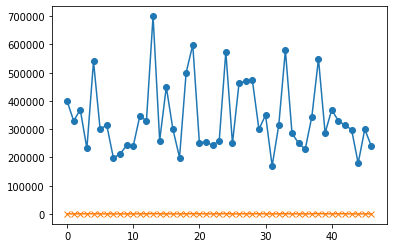

In [16]:
plt.plot(y,'-o',predicted,'-x')

Y ahora realicemos el entrenamiento completo:

In [17]:
W_opt=gradDesR(W,X2,y,0.00000001,100000)

In [18]:
predicted_uno=np.matmul(X2,W_opt.T)
J=ecm(predicted_uno,y)
print('Costo :',J)
print('Parametros: ',W_opt)

Costo : 2397484980.035704
Parametros:  [[  9.69579974 165.35391828  17.38361855]]


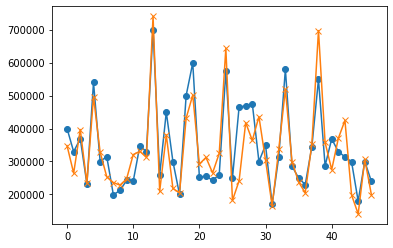

In [19]:
plt.plot(y,'-o',predicted_uno,'-x')

## ***Creamos función para implementar la regresión lineal multivariada***

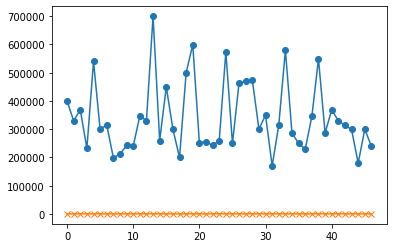

In [20]:
def prediction(predicted,Wg,Xg,y,alpha, iteraciones):

    x_one=np.array(data2.values[:,0:2])
    y=np.array(data2.values[:,2])
    y_one=y.reshape([y.size,1])

    W=np.random.random([1,3])

    predicted=np.matmul(X2,W.T)
    J=np.square(predicted-y).sum()/(2*y.size)
  
    for i in range(iteraciones):
      error=np.matmul(Xg,Wg.T)-y
      Wg=Wg-alpha*np.matmul(error.T,Xg)/y.size

    return predicted

predict = prediction(predicted,W,X2,y,0.00000001,100000)
#print(predict)
plt.plot(y,'-o',predict,'-x')

def entrenamiento(X,y,alpha,iteraciones):

  X_train=X[:45,:]
  y_train=y[:45,:]
  X_test=X[45:,:]
  y_test=y[45:,:]

  W_train=np.random.random([1,X.shape[1]])
  W_opt_train=gradDesR(W_train,X_train,y_train,alpha,iteraciones)
  predicted_train=np.matmul(X_train,W_opt_train.T)
  J=ecm(predicted_train,y_train)
  plt.plot(y_train,'-o',predicted_train,'-x')

  return predicted_train

def entrenamiento_duo(X,y,alpha,iteraciones):

  X_train=X[:45,:]
  y_train=y[:45,:]
  X_test=X[45:,:]
  y_test=y[45:,:]

  predicted_test=np.matmul(X_test,W_opt.T)
  J=ecm_duo(predicted_test,y_test)
  print('Costo despues del entrenamiento:',J)   
  plt.plot(y_test,'-o',predicted_test,'-x')

  return predicted_test



2. Utilizar la base de datos 50_Startups la cual consiste en el beneficio de 50 startups (NY, CA, FL). Esta base de datos tiene 5 columnas - "R&D Spend", "Administration", "Marketing Spend", "State", "Profit". Para este ejercicio van a utilizar las 3 primeras como entradas y la última como salida. Implementar el modelo de regresión para predecir el beneficio a partir de las tres variables de entrada. Graficar la salida vs la predicción para comparar. Se sugiere trabajar inicialmente sin normalizar y despues normalizando.

In [21]:
dataset = pd.read_csv('/content/ML/50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
y = dataset['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

Vamos a extraer las tres primeras columnas como entradas y la última columna como salida.

In [23]:
X_duo=np.array(dataset.values[:,0:3])
y_duo=np.array(dataset.values[:,4])
y_duo=y_duo.reshape([(y_duo.size),1])

In [24]:
print('Tamaño de X: ', X_duo.shape,'Tamaño de y: ',y_duo.shape)

Tamaño de X:  (50, 3) Tamaño de y:  (50, 1)


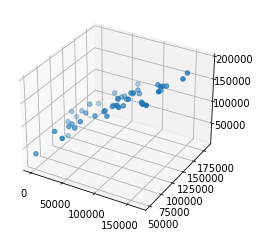

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_duo[:,0], X_duo[:,1], y_duo, cmap='Greens');

Vamos a inicializar los parametros, en este caso, construiremos un vector de pesos:

In [26]:
print(X_duo.shape[1])

3


A continuación creamos el vector de pesos, de 1 fila y N + 1 columnas, donde N es el número de variables.

Lo inicializamos con valores aleatorios:

In [27]:
W_duo=np.random.random([1,X_duo.shape[1]+1])
print(W_duo)

[[0.50142536 0.61995373 0.20748718 0.97718669]]


A continución, implementar la ecuación matricial para la predicción del modelo:


Para esta implementación se debe agregar una columna de unos para multiplicar al parametro $w_0$

In [28]:
X2_duo=np.c_[np.ones((X_duo.shape[0],1)),X_duo]
print(X2_duo[:5,:])

[[1.0 165349.2 136897.8 471784.1]
 [1.0 162597.7 151377.59 443898.53]
 [1.0 153441.51 101145.55 407934.54]
 [1.0 144372.41 118671.85 383199.62]
 [1.0 142107.34 91391.77 366168.42]]


Seguimos con la función de predicción, donde como parametros recibe los parametros como vector y las observaciones X como una matriz, en esta matriz, las filas corresponden a las observaciones y las columnas a las características o variables.



In [29]:
prediction_duo=np.matmul(X2_duo,W_duo.T)
print(prediction_duo.shape)

(50, 1)


La función de costo:

In [30]:
def ecm_duo(predicted,y):
    J_duo=np.square(predicted-y).sum()/(2*y.size)
    return J_duo

Vamos a calcular el costo:

In [31]:
J_duo=ecm_duo(prediction_duo,y_duo)
print(J_duo)

19594180586.433968


La función para el gradiente descendiente:

In [32]:
def gradDesR_duo(Wg,Xg,y,alpha,iteraciones):
    for i in range(iteraciones):
      error=np.matmul(Xg,Wg.T)-y
      Wg=Wg-alpha*np.matmul(error.T,Xg)/y.size
    return Wg

Y ahora inicialicemos los pesos y calculemos la función de costo:

In [33]:
W_duo=np.random.random([1,4])
predicted_duo=np.matmul(X2_duo,W_duo.T)
J_duo=ecm_duo(predicted_duo,y_duo)
print('Costo :',J_duo)
print('Parametros: ',W_duo)

Costo : 13705304936.06173
Parametros:  [[0.64486876 0.06773065 0.66335807 0.82320225]]


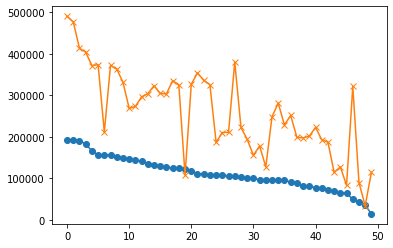

In [34]:
plt.plot(y_duo,'-o',predicted_duo,'-x')

Y ahora realicemos el entrenamiento completo:

In [35]:
W_opt_duo=gradDesR_duo(W_duo,X2_duo,y_duo,0.00000000001,1000000)

In [36]:
predicted_duo=np.matmul(X2_duo,W_opt_duo.T)
J_duo=ecm_duo(predicted_duo,y_duo)
print('Costo :',J_duo)
print('Parametros: ',W_opt_duo)

Costo : 88779826.9298312
Parametros:  [[0.6646448623743849 0.7179537982523779 0.32769002238120903
  0.08217880406111933]]


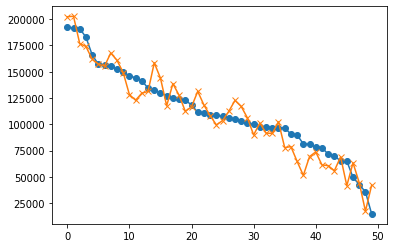

In [37]:
plt.plot(y_duo,'-o',predicted_duo,'-x')

## Entrenamiento de datos, punto 2


In [38]:
def entrenamiento_duo(X,y,alpha,iteraciones):

  X_train=X[:40,:]
  y_train=y[:40,:]
  X_test=X[40:,:]
  y_test=y[40:,:]

  W_train=np.random.random([1,X.shape[1]])
  W_opt=gradDesR_duo(W_train,X_train,y_train,alpha,iteraciones)
  predicted_train=np.matmul(X_train,W_opt.T)
  J=ecm_duo(predicted_train,y_train)
  plt.plot(y_train,'-o',predicted_train,'-x')

  return predicted_train, W_opt

def prediction_test_duo(W,X,y):

  X_test=X[40:,:]
  y_test=y[40:,:]

  predicted_test=np.matmul(X_test,W.T)
  J=ecm_duo(predicted_test,y_test)
  print('Costo despues del entrenamiento:',J)   
  plt.plot(y_test,'-o',predicted_test,'-x')

  return predicted_test


## Predicción con datos del entrenamiento

[[0.3291569974792586 0.7137060798345078 0.30882569579614
  0.0915456520535559]]


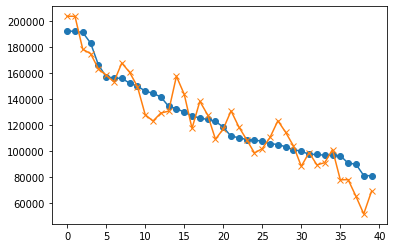

In [39]:
predicted_tr,W_opt_train = entrenamiento_duo(X2_duo,y_duo,0.000000000001,10000)
print(W_opt_train)

## Predicción con datos del test

Costo despues del entrenamiento: 129567534.30797212


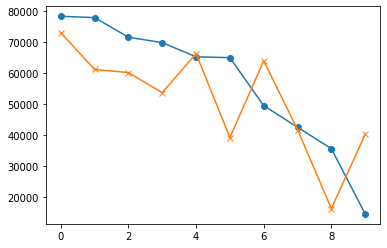

In [40]:
pre_test = prediction_test_duo(W_opt_train,X2_duo,y_duo)

# Parte 2 - Agregando librerías de python para la regresión

In [55]:
from sklearn.preprocessing import MinMaxScaler   #Función para escalar o normalizar los datos
#from sklearn.model_selection import validation_curve #Función para evaluar o validar el rendimiento de los modelos
from sklearn.model_selection import train_test_split #Función para separar los datos en un conjunto de entrenamiento y otro de test
from sklearn.linear_model import LinearRegression  #Función para implementar un esquema de regresión lineal
from sklearn.linear_model import Ridge #Regresion lineal con regularizacion L2
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

### *Antes de realizar predicción, hacemos manejo de la columna con datos categoricos*

Sacamos la columna de los estados y la convertimos

In [57]:
States = dataset['State']
States_convert = pd.get_dummies(States)

In [58]:
States_convert

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [65]:
new_dataset = pd.DataFrame()
new_dataset['R&D Spend'] = dataset['R&D Spend']
new_dataset['Administration'] = dataset['Administration']
new_dataset['Marketing Spend'] = dataset['Marketing Spend']
new_dataset['California'] = States_convert['California']
new_dataset['Florida'] = States_convert['Florida']
new_dataset['New York'] = States_convert['New York']
new_dataset['Profit'] = dataset['Profit']

In [66]:
new_dataset

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94
5,131876.90,99814.71,362861.36,0,0,1,156991.12
6,134615.46,147198.87,127716.82,1,0,0,156122.51
7,130298.13,145530.06,323876.68,0,1,0,155752.60
8,120542.52,148718.95,311613.29,0,0,1,152211.77
9,123334.88,108679.17,304981.62,1,0,0,149759.96


In [73]:
X_lib=np.array(new_dataset.values[:,0:5])
y_duo=np.array(new_dataset.values[:,6])
y_lib=y_duo.reshape([(y_duo.size),1])

### División de la base de datos y escalado
La base de datos se debe separar en un conjunto de entrenamiento y otro de test:

In [74]:
X_lib_train, X_lib_test, y_lib_train, y_lib_test = train_test_split(X_lib,y_lib,random_state=0)

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(X_lib_train,y_lib_train)

LinearRegression()

In [77]:
y_predict_train=lr.predict(X_lib_train)

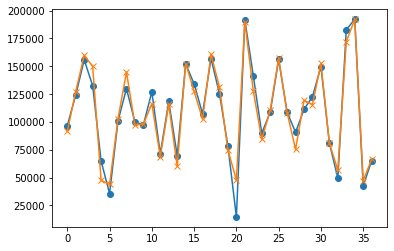

In [78]:
plt.plot(y_lib_train,'-o',y_predict_train,'-x')

In [79]:
print(mean_squared_error(y_lib_train,y_predict_train))

85957247.2994923


### R^2 (coeficiente de determinación) función de puntuación de regresión.

*La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor). En el caso general, cuando la y verdadera no es constante, un modelo constante que siempre prediga la y promedio sin tener en cuenta las características de entrada obtendría una
puntuación de 0,0.*

In [80]:
print(r2_score(y_lib_train,y_predict_train))

0.9511705268907698


Podemos observar que el resultado fue casi 1 en la función de puntuación de regresión, el modelo no presentará tantos errores para la predicción

In [82]:
y_predict_test=lr.predict(X_lib_test)
print(r2_score(y_lib_test,y_predict_test))

0.9315815199156308


### Escalamiento
Por otro lado, las características se deben escalar, ya que es importante que todas las características sean conmesurables. Los algoritmos de aprendizaje de máquina se pueden ver afectados en su rendimiento, si por ejemplo, tiene una característica en un rango entre 0 y 1 y otra caracteristica entre 0 y 1000.

In [83]:
scaler1 = MinMaxScaler()
scaler1.fit(X_lib_train)
scaler2 = MinMaxScaler()
scaler2.fit(y_lib_train)
X_train_scaled= scaler1.transform(X_lib_train)
X_test_scaled= scaler1.transform(X_lib_test)
y_train_scaled=scaler2.transform(y_lib_train)
y_test_scaled=scaler2.transform(y_lib_test)

In [84]:
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [89]:
y_predict_train=lr.predict(X_train_scaled)
print(r2_score(y_train_scaled,y_predict_train))

0.9511705268907698


In [88]:
y_predict_test=lr.predict(X_test_scaled)
print(r2_score(y_test_scaled,y_predict_test))

0.9315815199152063


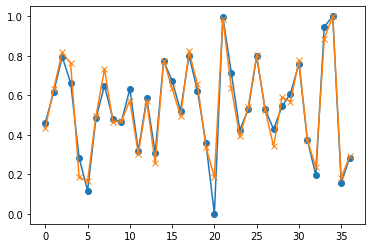

In [90]:
plt.plot(y_train_scaled,'-o',y_predict_train,'-x')

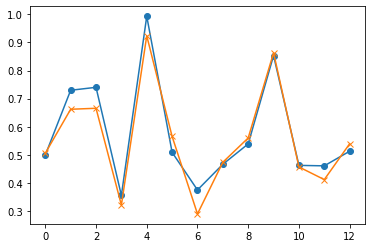

In [92]:
plt.plot(y_test_scaled,'-o',y_predict_test,'-x')